<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/Regression_Predicting_Car_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models based on Confusion Matrix. Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

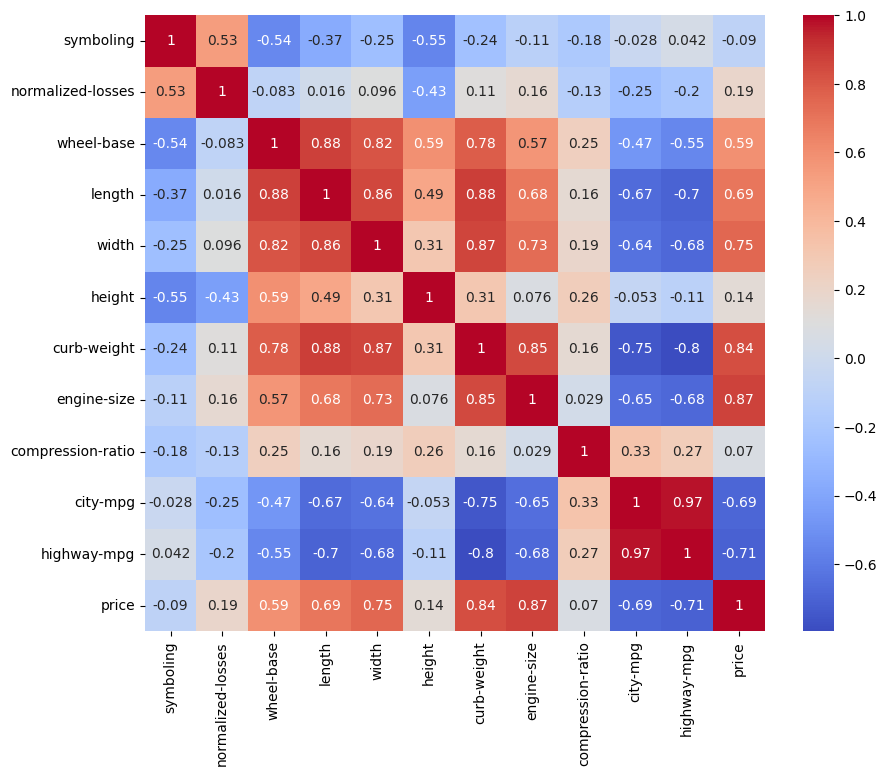

price                1.000000
engine-size          0.871051
curb-weight          0.835277
width                0.753236
length               0.692774
wheel-base           0.588382
normalized-losses    0.191829
height               0.139003
compression-ratio    0.069881
symboling           -0.090242
city-mpg            -0.688254
highway-mpg         -0.705924
Name: price, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['symboling'] = pd.to_numeric(df['symboling'], errors='coerce')
numeric_df = df.select_dtypes(exclude=['object'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

In [17]:
x = df.drop(['price','height','symboling','normalized-losses','compression-ratio','aspiration','num-of-doors','engine-location'], axis=1)
y = df['price']

In [18]:
x.head()

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,2.68,111,5000,21,27
1,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,2.68,111,5000,21,27
2,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,3.47,154,5000,19,26
3,audi,gas,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,3.4,102,5500,24,30
4,audi,gas,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,3.4,115,5500,18,22


In [19]:
x['num-of-cylinders'] = x['num-of-cylinders'].replace(['four', 'six', 'five', 'eight', 'two', 'three', 'twelve', 'sixteen', 'two'], [4, 6, 5, 8, 2, 3, 12, 16, 2])
x.head()

<ipython-input-19-330009471fc1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['num-of-cylinders'] = x['num-of-cylinders'].replace(['four', 'six', 'five', 'eight', 'two', 'three', 'twelve', 'sixteen', 'two'], [4, 6, 5, 8, 2, 3, 12, 16, 2])


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,2.68,111,5000,21,27
1,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,2.68,111,5000,21,27
2,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,3.47,154,5000,19,26
3,audi,gas,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,3.4,102,5500,24,30
4,audi,gas,sedan,4wd,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,3.4,115,5500,18,22


In [33]:
x.isnull().sum()

,0
make,0
fuel-type,0
body-style,0
drive-wheels,0
wheel-base,0
length,0
width,0
curb-weight,0
engine-type,0
num-of-cylinders,0


In [32]:
import numpy as np

# np.array(x['fuel-type'])
np.array(df['body-style'])
# print(df['fuel-system'].unique())
x['num-of-cylinders'].dtype

dtype('int64')

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['fuel-type'] = le.fit_transform(x['fuel-type'])
x['body-style'] = le.fit_transform(x['body-style'])
x['drive-wheels'] = le.fit_transform(x['drive-wheels'])
x['engine-type'] = le.fit_transform(x['engine-type'])
x['make'] = le.fit_transform(x['make'])
x['fuel-system'] = le.fit_transform(x['fuel-system'])
x.head()

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111,5000,21,27
1,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111,5000,21,27
2,0,1,2,2,94.5,171.2,65.5,2823,4,6,152,5,2.68,3.47,154,5000,19,26
3,1,1,3,1,99.8,176.6,66.2,2337,2,4,109,5,3.19,3.4,102,5500,24,30
4,1,1,3,0,99.4,176.6,66.4,2824,2,5,136,5,3.19,3.4,115,5500,18,22


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

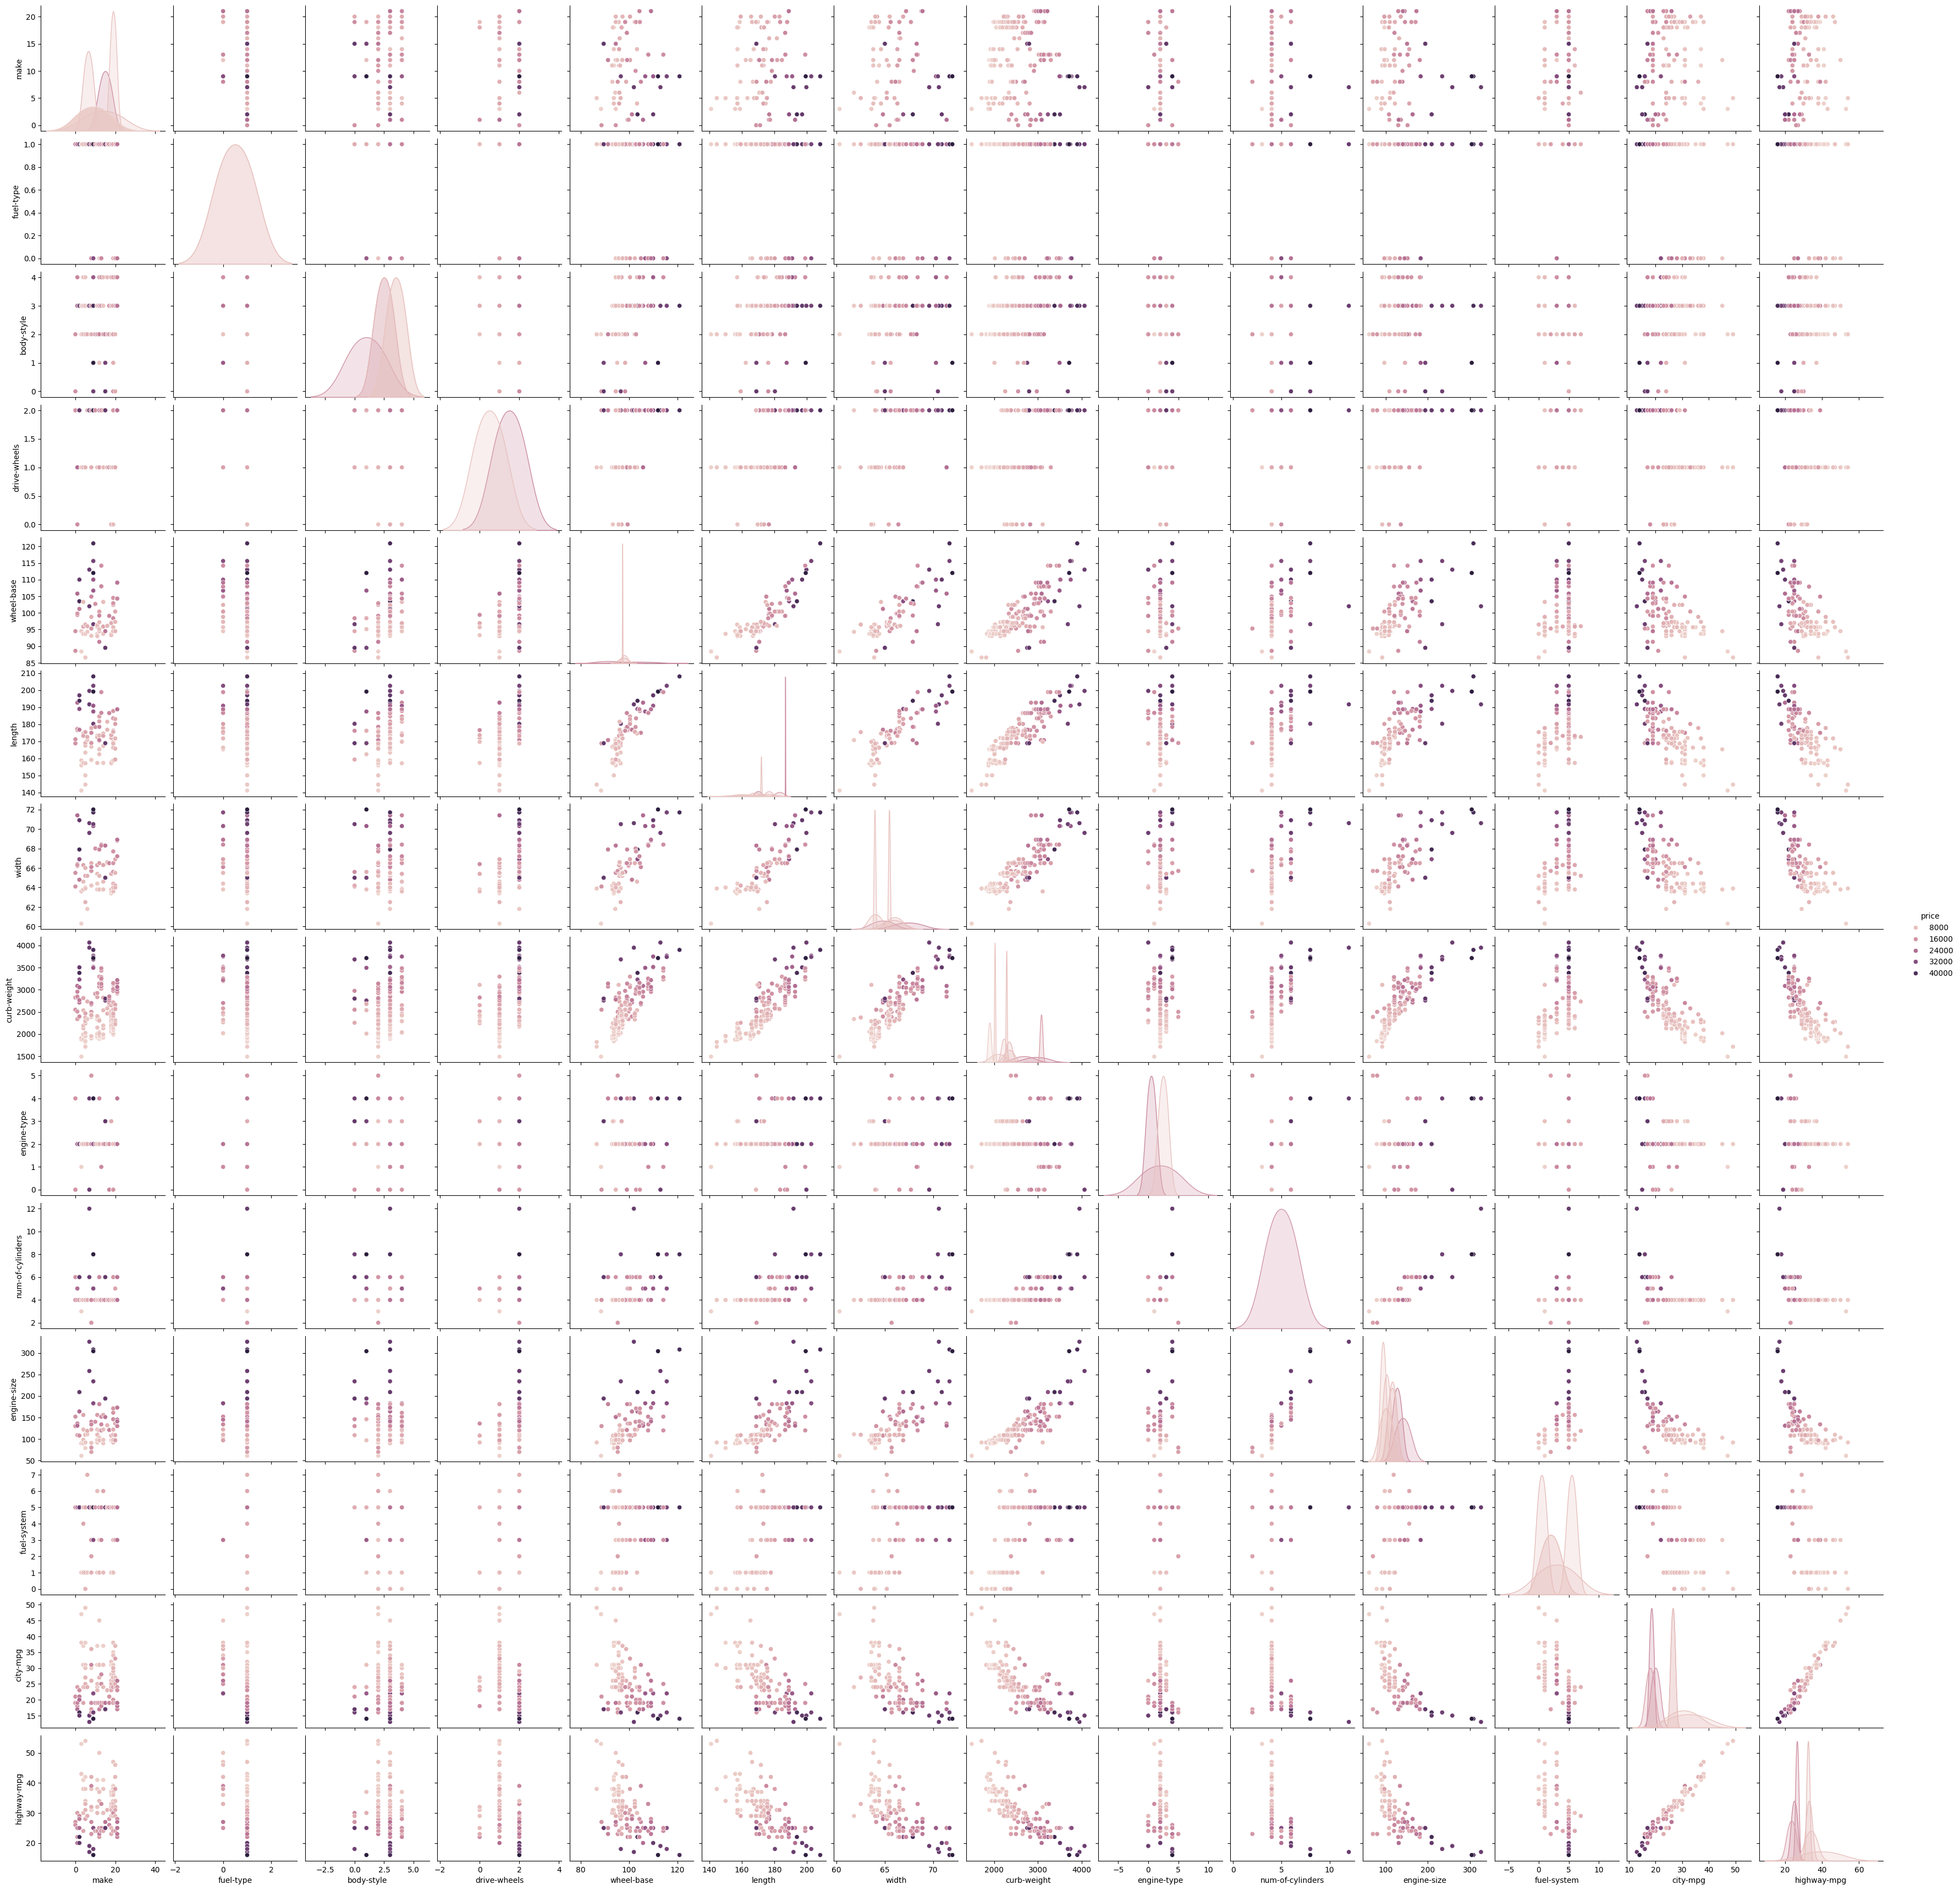

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
x['price'] = y
sns.pairplot(x, hue='price')
plt.show()

In [36]:
x.drop('price', axis=1, inplace=True)
x.head()

,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111,5000,21,27
1,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111,5000,21,27
2,0,1,2,2,94.5,171.2,65.5,2823,4,6,152,5,2.68,3.47,154,5000,19,26
3,1,1,3,1,99.8,176.6,66.2,2337,2,4,109,5,3.19,3.4,102,5500,24,30
4,1,1,3,0,99.4,176.6,66.4,2824,2,5,136,5,3.19,3.4,115,5500,18,22


#Data spliting

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x is your DataFrame

# Replace '?' with NaN
x = x.replace('?', pd.NA)

# Convert columns to numeric, coercing errors to NaN
for col in ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']:
    x[col] = pd.to_numeric(x[col], errors='coerce')

x.head()


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111.0,5000.0,21,27
1,0,1,0,2,88.6,168.8,64.1,2548,0,4,130,5,3.47,2.68,111.0,5000.0,21,27
2,0,1,2,2,94.5,171.2,65.5,2823,4,6,152,5,2.68,3.47,154.0,5000.0,19,26
3,1,1,3,1,99.8,176.6,66.2,2337,2,4,109,5,3.19,3.40,102.0,5500.0,24,30
4,1,1,3,0,99.4,176.6,66.4,2824,2,5,136,5,3.19,3.40,115.0,5500.0,18,22


In [43]:
x['bore'] = x['bore'].fillna(x['bore'].mean())
x['stroke'] = x['stroke'].fillna(x['stroke'].mean())
x['horsepower'] = x['horsepower'].fillna(x['horsepower'].mean())
x['peak-rpm'] = x['peak-rpm'].fillna(x['peak-rpm'].mean())

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']])
x_test_scale = scaler.transform(x_test[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']])


# Linear

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [108]:
l = LinearRegression()
l.fit(x_train, y_train)
l.score(x_train, y_train)

0.8643171678157776

In [109]:
l.score(x_test,y_test)

0.8395855510412573

#Decision tree regression

In [208]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=20, criterion='friedman_mse',max_leaf_nodes=20)
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)

0.9731384969792964

In [209]:
dtr.score(x_test,y_test)

0.9467559017816505

#Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scale, y_train)
model.score(x_train_scale, y_train)

0.9851982972239054

In [105]:
model.score(x_test_scale,y_test)

0.9430281112531502

#Model Evalution

In [205]:
from sklearn.metrics import r2_score, mean_squared_error
l_pred = l.predict(x_test)
l_r2 = r2_score(y_test, l_pred)
l_mse = mean_squared_error(y_test, l_pred)
l_rmse = mean_squared_error(y_test, l_pred, squared=False)

dtr_pred = dtr.predict(x_test)
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = mean_squared_error(y_test, dtr_pred, squared=False)
print(f"Decision tree regression R-squared:{dtr_r2}")
print(f"Decision tree regression Mean Squared Error:{dtr_mse}")
print(f"Decision tree regression Root Mean Squared Error:{dtr_rmse}\n\n")

print(f"Linear Regression R-squared:{l_r2}")
print(f"Linear Regression Mean Squared Error:{l_mse}")
print(f"Linear Regression Root Mean Squared Error:{l_rmse}\n\n")

print("Random Forest Regression R-squared:", l_r2)
print("Random Forest Regression Mean Squared Error:", l_mse)
print(f"Random Forest Regression Root Mean Squared Error:{l_rmse}\n\n")

Decision tree regression R-squared:0.9467559017816505
Decision tree regression Mean Squared Error:6118995.308242958
Decision tree regression Root Mean Squared Error:2473.660305749954


Linear Regression R-squared:0.8395855510412573
Linear Regression Mean Squared Error:18435381.44880526
Linear Regression Root Mean Squared Error:4293.644308603737


Random Forest Regression R-squared: 0.8395855510412573
Random Forest Regression Mean Squared Error: 18435381.44880526
Random Forest Regression Root Mean Squared Error:4293.644308603737




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Summary:

- **Decision Tree Regression** performs best with an **R-squared of 0.9468** and the lowest error metrics (MSE: 6,118,995.31, RMSE: 2,473.66), indicating strong predictive accuracy.
- **Linear Regression** and **Random Forest Regression** both perform similarly, with an **R-squared of 0.8396** and significantly higher errors (MSE: 18,435,381.45, RMSE: 4,293.64), suggesting they are less effective at predicting car prices.
- Overall, **Decision Tree Regression** is the most suitable model for this problem, capturing more variance and delivering more precise predictions.